# Investigating The Effect of Guest Stars on The Office Series

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Initializing the MinMaxScaler

In [2]:
mmscaler = MinMaxScaler()

### Reading the csv file and inspect the first five rows of the office dataframe

In [3]:
office = pd.read_csv('the_office_series.csv')
office.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


### Getting basic information on office dataframe

In [4]:
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


### Converting Date column to datetime type

In [5]:
office.Date = pd.to_datetime(office.Date)

### Dropping the Unnamed Column

In [6]:
office.drop('Unnamed: 0', axis = 1, inplace = True)
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Season        188 non-null    int64         
 1   EpisodeTitle  188 non-null    object        
 2   About         188 non-null    object        
 3   Ratings       188 non-null    float64       
 4   Votes         188 non-null    int64         
 5   Viewership    188 non-null    float64       
 6   Duration      188 non-null    int64         
 7   Date          188 non-null    datetime64[ns]
 8   GuestStars    29 non-null     object        
 9   Director      188 non-null    object        
 10  Writers       188 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 16.3+ KB


### Group by Season and calculate the average of the Ratings, Votes and Viewership columns

In [7]:
averages = office.groupby('Season')[['Ratings', 'Votes', 'Viewership']].mean().reset_index()
averages

,Season,Ratings,Votes,Viewership
0,1,7.966667,4304.000000,6.366667
1,2,8.440909,3493.909091,8.168182
2,3,8.586957,3224.086957,8.494348
3,4,8.564286,3195.642857,8.547857
4,5,8.488462,2885.615385,8.756538
5,6,8.196154,2505.307692,7.766154
6,7,8.308333,2748.083333,7.305833
7,8,7.604167,2039.250000,5.385417
8,9,7.913043,2475.826087,4.138696


### Plot of the Averages of Ratings, Votes and Viewership by Season

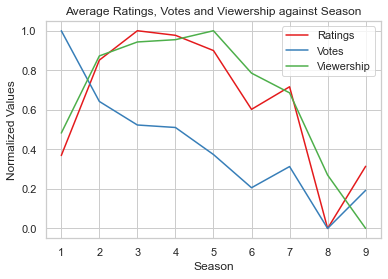

In [8]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale = 1)
sns.set_palette('Set1')

plt.plot(averages.Season, mmscaler.fit_transform(averages[['Ratings']]), label = 'Ratings')
plt.plot(averages.Season, mmscaler.fit_transform(averages[['Votes']]), label = 'Votes')
plt.plot(averages.Season, mmscaler.fit_transform(averages[['Viewership']]), label = 'Viewership')
plt.xlabel('Season')
plt.ylabel('Normalized Values')
plt.title('Average Ratings, Votes and Viewership against Season')
plt.legend()
plt.show()

### Adding of has_guests column

In [9]:
office['has_guests'] = office.GuestStars.notna()
office.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,has_guests
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False


### Group by Season and has_guests and calculate the average of the Ratings, Votes and Viewership columns

In [10]:
guests_average = office.groupby(['Season', 'has_guests'])[['Ratings', 'Votes', 'Viewership']].mean().reset_index()
guests_average

,Season,has_guests,Ratings,Votes,Viewership
0,1,False,8.020000,4394.000000,6.680000
1,1,True,7.700000,3854.000000,4.800000
2,2,False,8.437500,3505.187500,8.159375
3,2,True,8.450000,3463.833333,8.191667
4,3,False,8.604545,3233.045455,8.526818
5,3,True,8.200000,3027.000000,7.780000
6,4,False,8.576923,3222.692308,8.520000
7,4,True,8.400000,2844.000000,8.910000
8,5,False,8.452174,2682.565217,8.166087
9,5,True,8.766667,4442.333333,13.283333


### Function to plot bar chart of the average Ratings, Votes and Viewership by Season and Has_guests

In [11]:
def barchart_avg(df, x_values, y_values):
    sns.set_style('ticks')
    sns.set_context('poster', font_scale = 0.8)
    sns.set_palette('Set1')
    sns.barplot(data = df, x = x_values, y = y_values, hue = 'has_guests')
    plt.title('Average ' + y_values + ' per Season by Guest Stars Appearance')
    plt.show()

### Average Ratings against Season

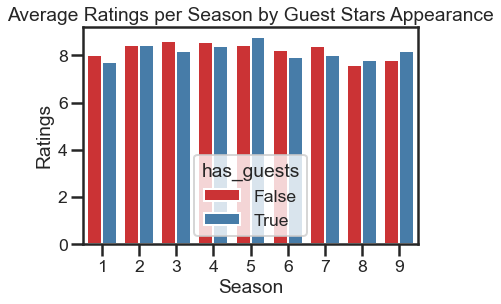

In [12]:
ratings_avg = barchart_avg(guests_average, 'Season', 'Ratings')
ratings_avg

### Average Votes against Season

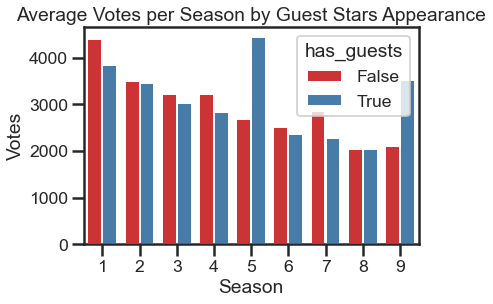

In [13]:
votes_avg = barchart_avg(guests_average, 'Season', 'Votes')
votes_avg

### Average Viewership against Season

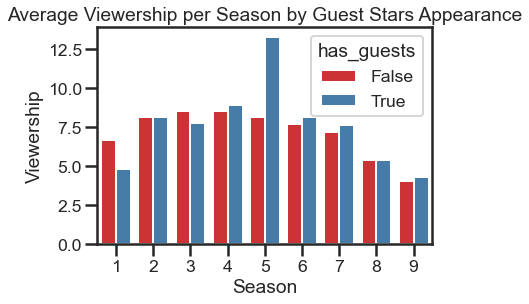

In [14]:
views_avg = barchart_avg(guests_average, 'Season', 'Viewership')
views_avg

### Getting the guests dataframe

In [15]:
guests = office[office.has_guests == True].copy()
guests.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,has_guests
5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,2005-04-26,Amy Adams,Amy Heckerling,Mindy Kaling,True
8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,2005-10-04,Nancy Carell,Paul Feig,Michael Schur,True
9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,2005-10-11,Amy Adams,Ken Kwapis,B. J. Novak,True
12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,2005-11-08,Tim Meadows,Greg Daniels,Paul Lieberstein,True
14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,2005-11-22,Ken Jeong,Paul Feig,Jennifer Celotta,True


### Adding the number of guests stars as a column

In [16]:
num_guests = []
for i in guests.GuestStars:
    num_guests.append(len(i.split(',')))

guests['num_guests'] = num_guests
guests.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,has_guests,num_guests
5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,2005-04-26,Amy Adams,Amy Heckerling,Mindy Kaling,True,1
8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,2005-10-04,Nancy Carell,Paul Feig,Michael Schur,True,1
9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,2005-10-11,Amy Adams,Ken Kwapis,B. J. Novak,True,1
12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,2005-11-08,Tim Meadows,Greg Daniels,Paul Lieberstein,True,1
14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,2005-11-22,Ken Jeong,Paul Feig,Jennifer Celotta,True,1


### Number of Guests Stars in each Season

In [17]:
num_guests_avg = guests.groupby('Season').num_guests.sum().reset_index()
num_guests_avg

,Season,num_guests
0,1,1
1,2,6
2,3,1
3,4,1
4,5,5
5,6,3
6,7,8
7,8,4
8,9,9


### Bar Chart of Guests Stars in each Season

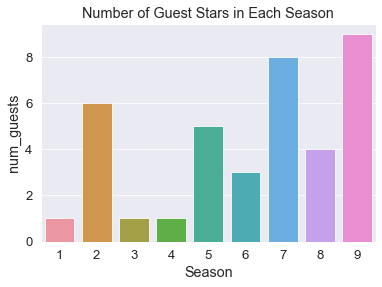

In [18]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.5)
sns.set_palette('Set2')
sns.barplot(data = num_guests_avg, x = 'Season', y = 'num_guests')
plt.title('Number of Guest Stars in Each Season')
plt.show()

### Function to plot bar chart of the Ratings, Votes and Viewership by Season and num_guests

In [19]:
def barchart(df, x_values, y_values):
    sns.set_style('ticks')
    sns.set_context('paper', font_scale = 1)
    sns.set_palette('Set2')
    sns.barplot(data = guests, x = x_values, y = y_values, hue = 'num_guests', ci = None)
    plt.title(y_values + ' per Season by Number of Guest Stars in each Episode')
    plt.show()

### Ratings of episodes with Guest Stars against Season

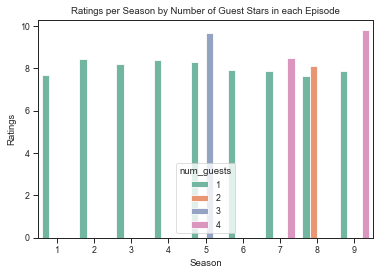

In [20]:
ratings_guests = barchart(guests, 'Season', 'Ratings')
ratings_guests

### Votes of episodes with Guest Stars against Season

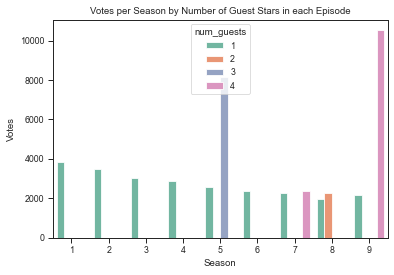

In [21]:
votes_guests = barchart(guests, 'Season', 'Votes')
votes_guests

### Views of episodes with Guest Stars against Season

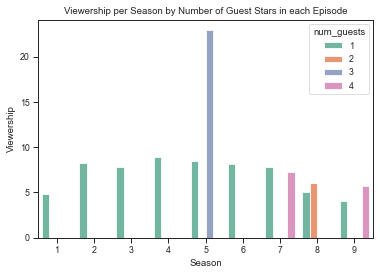

In [22]:
views_guests = barchart(guests, 'Season', 'Viewership')
views_guests